# MNIST after autoencoding and decoding

## Preliminaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [2]:
sys.path.append('../autoencoder_fft_mnist')

In [3]:
import fft_autoencoder

In [4]:
%matplotlib inline

In [5]:
plt.rcParams['figure.figsize'] = [13.5, 9.]
plt.rcParams['font.size'] = 24.

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Autoencoded Data

In [7]:
hybrid_value = 7

for n_compressed in [10,20,30,40,50]:
    fft_autoencoder.add_autoencoded_mnist_data_set(mnist.train, n_compressed)
    fft_autoencoder.add_fft_autoencoded_mnist_data_set(mnist.train, n_compressed)
    fft_autoencoder.add_hybrid_autoencoded_data_set(mnist.train, (n_compressed - hybrid_value, hybrid_value))

## Plots

### Original

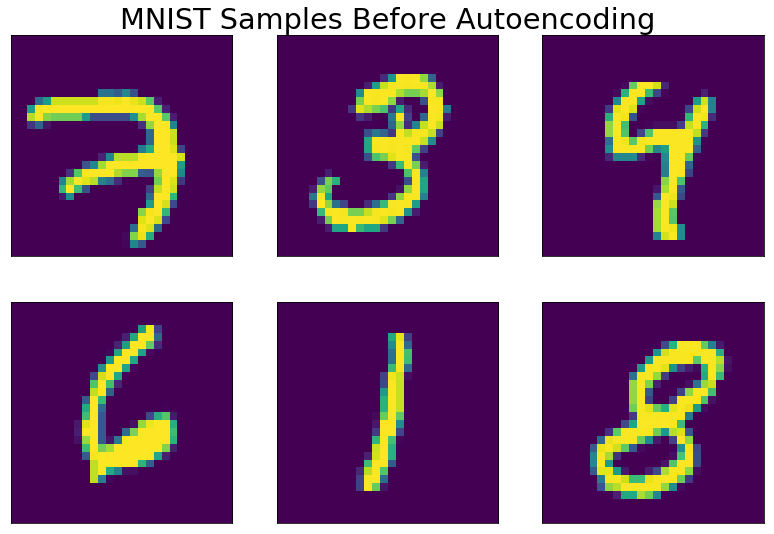

In [8]:
image_data = mnist.train.images[:6].reshape(-1, 28, 28)
plot_dir = 'plots'
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(image_data[i])
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False)
plt.subplot(2,3,2)
plt.title('MNIST Samples Before Autoencoding')
plt.savefig(os.path.join(plot_dir, 'originals.png'))

### Autoencoded (no FFT)

In [9]:
def autoencoded_plot(n, plot_dir = 'plots'):
    image_data = fft_autoencoder.decode(mnist.train.autoencoder[n], n).reshape(-1, 28, 28)
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(image_data[i])
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_visible(False)
        cur_axes.axes.get_yaxis().set_visible(False)
    plt.suptitle('   MNIST Samples from ' + str(n) + '-D Autoencoder (no FFT)')
    image_name = 'autoencoder-' + str(n) + '.png'
    plt.savefig(os.path.join(plot_dir, image_name))

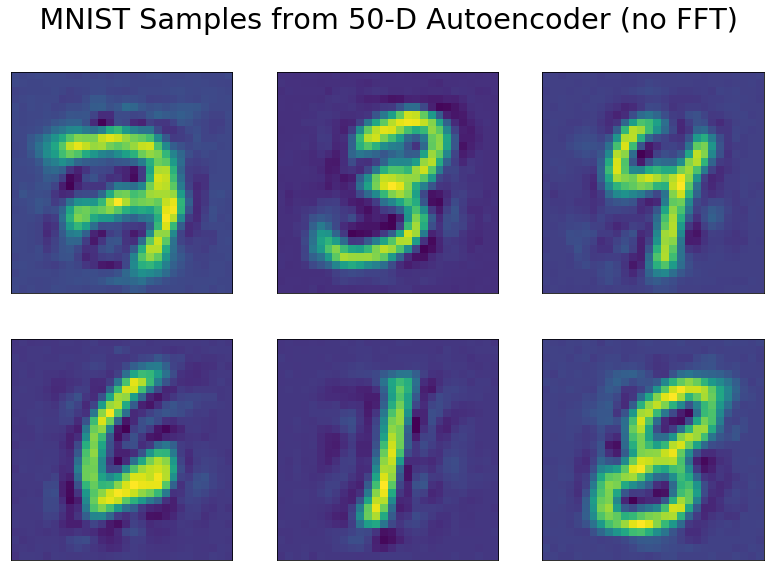

In [10]:
autoencoded_plot(50)

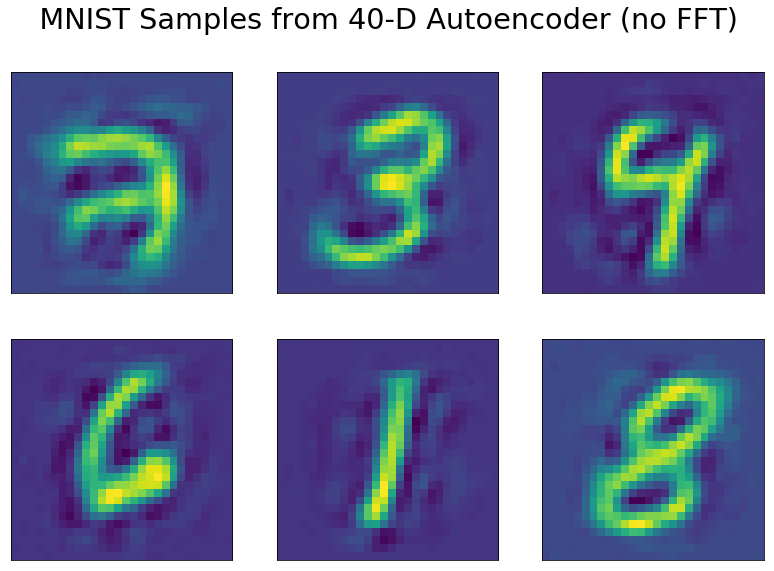

In [11]:
autoencoded_plot(40)

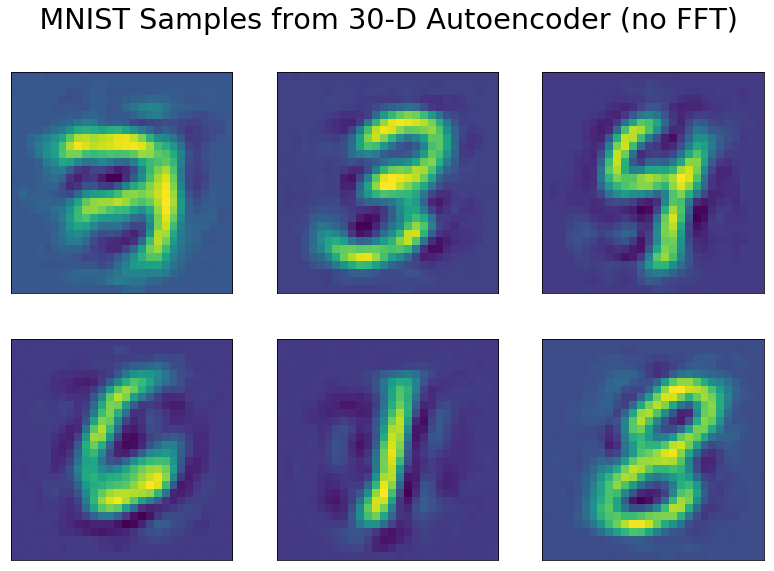

In [12]:
autoencoded_plot(30)

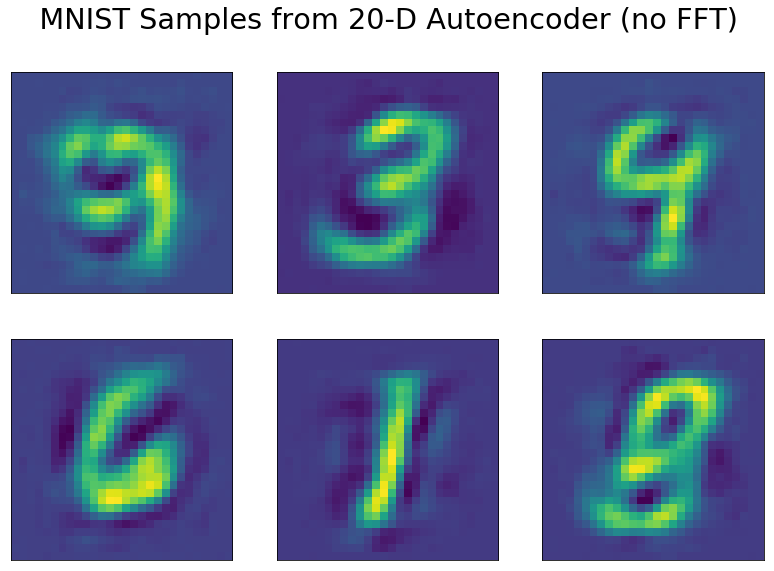

In [13]:
autoencoded_plot(20)

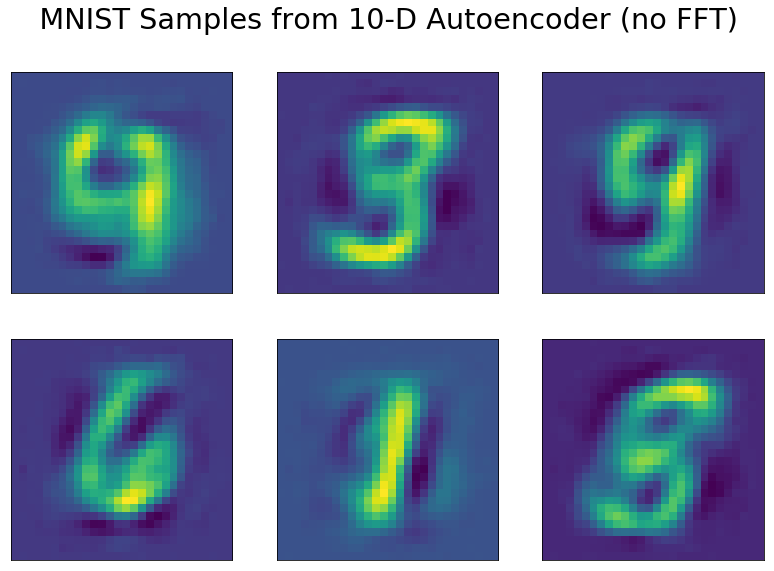

In [14]:
autoencoded_plot(10)

### FFT Autoencoded

In [15]:
def fft_autoencoded_plot(n, plot_dir = 'plots'):
    image_data = fft_autoencoder.image_from_compressed_fft(mnist.train.fft_autoencoder[n]).reshape(-1, 28, 28)
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(image_data[i])
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_visible(False)
        cur_axes.axes.get_yaxis().set_visible(False)
    plt.suptitle('   MNIST Samples from ' + str(n) + '-D Autoencoder (no FFT)')
    image_name = 'fft_autoencoder-' + str(n) + '.png'
    plt.savefig(os.path.join(plot_dir, image_name))

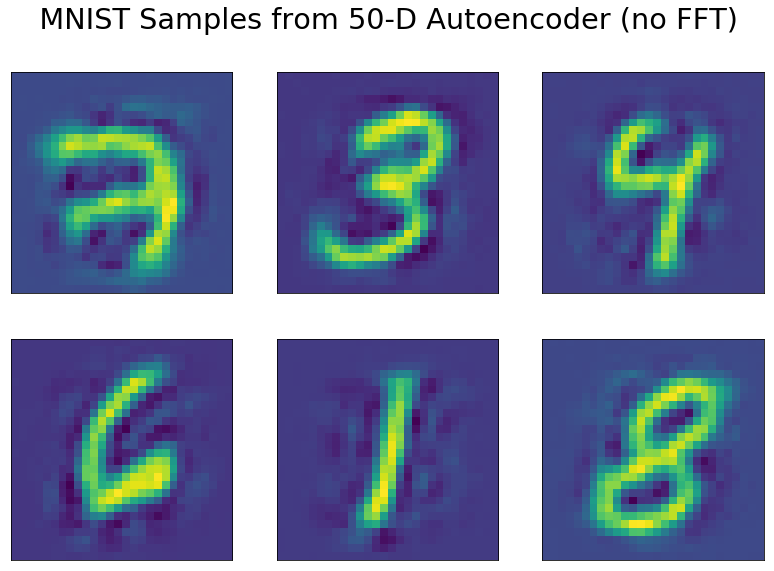

In [16]:
fft_autoencoded_plot(50)

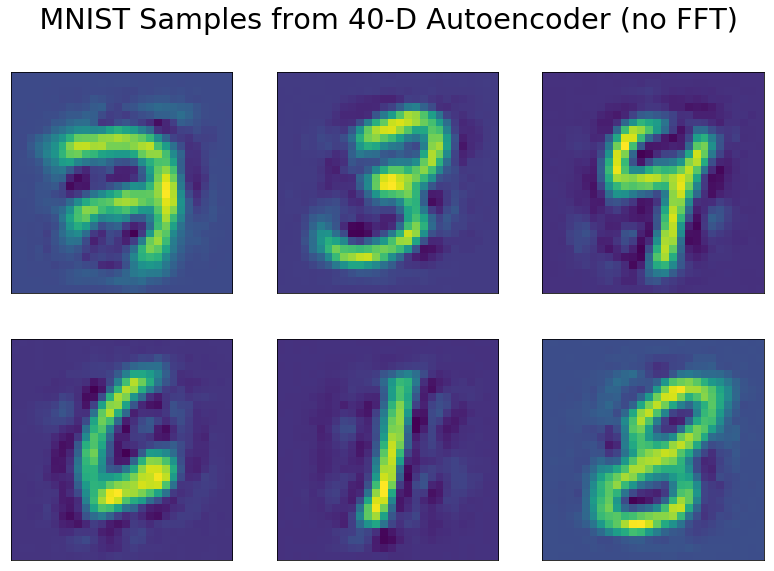

In [17]:
fft_autoencoded_plot(40)

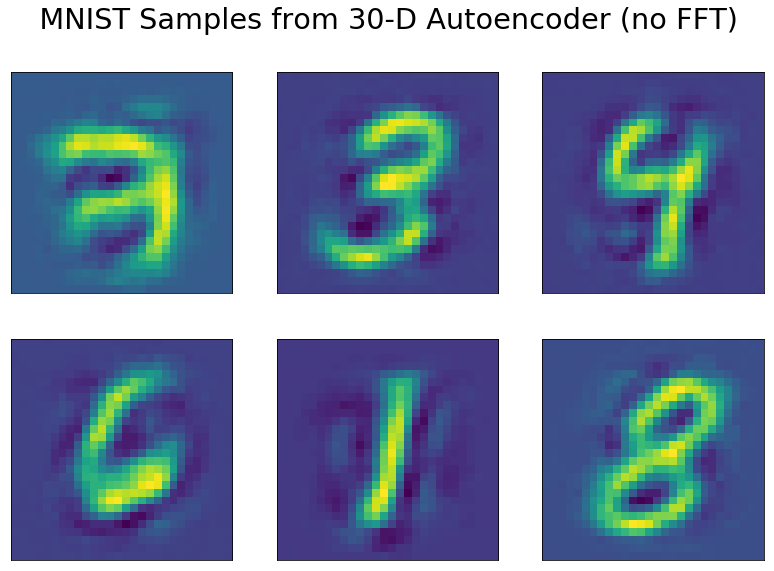

In [18]:
fft_autoencoded_plot(30)

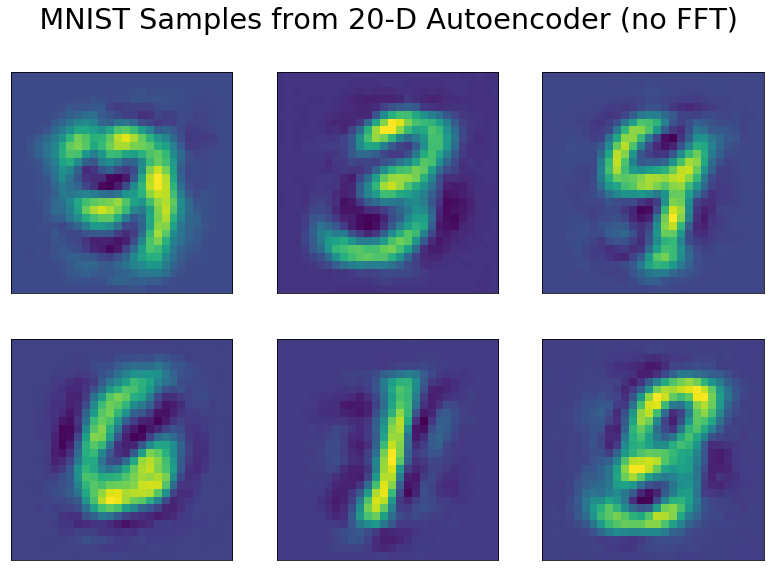

In [19]:
fft_autoencoded_plot(20)

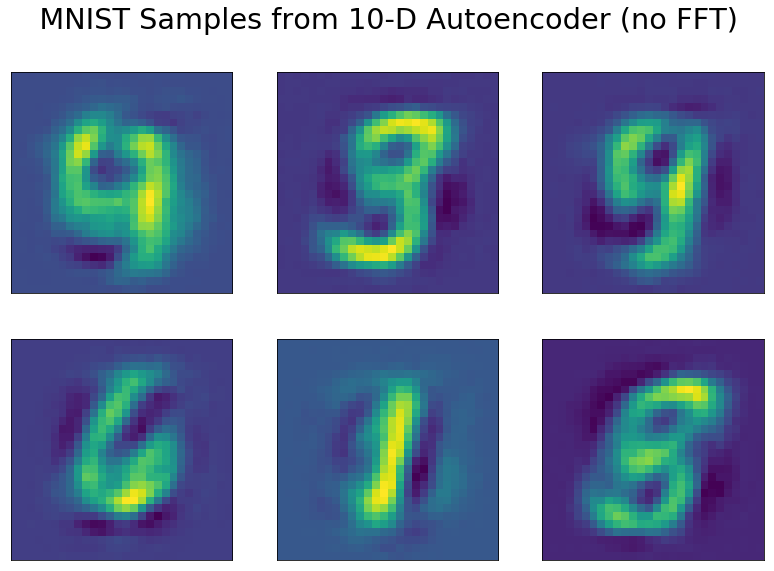

In [20]:
fft_autoencoded_plot(10)

### Hybrid non-FFT /FFT Autoencoded

In [21]:
def hybrid_autoencoded_plot(dim_tuple, plot_dir = 'plots'):
    image_data = fft_autoencoder.hybrid_decode(mnist.train.hybrid_autoencoder[dim_tuple], dim_tuple
                                              ).reshape(-1, 28, 28)
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(image_data[i])
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_visible(False)
        cur_axes.axes.get_yaxis().set_visible(False)
    plt.suptitle('   MNIST Samples from ' + str(dim_tuple) + ' Autoencoder (Hybrid non-FFT/ FFT)')
    image_name = 'fft_autoencoder-' + str(dim_tuple[0]) + '_' + str(dim_tuple[1]) + '.png'
    plt.savefig(os.path.join(plot_dir, image_name))

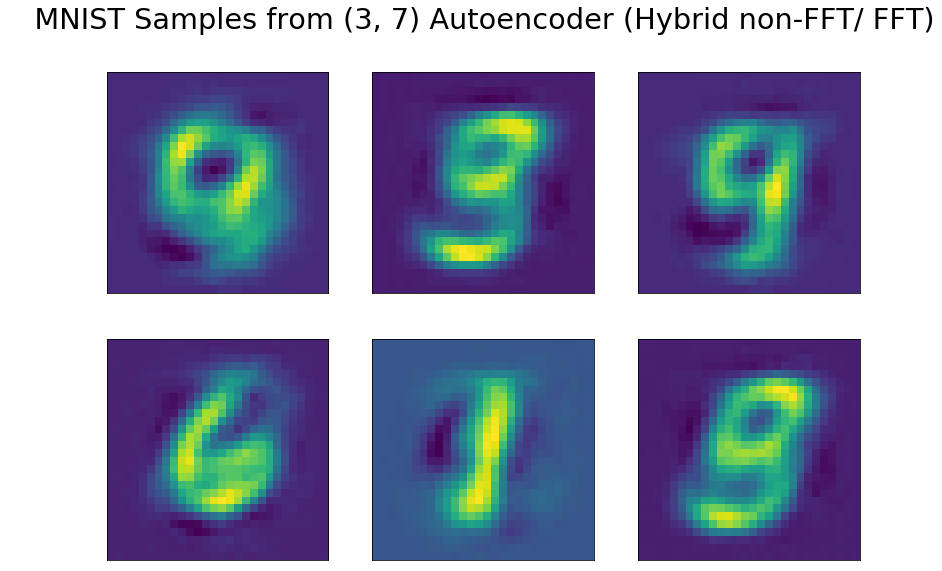

In [22]:
hybrid_autoencoded_plot((3,7))

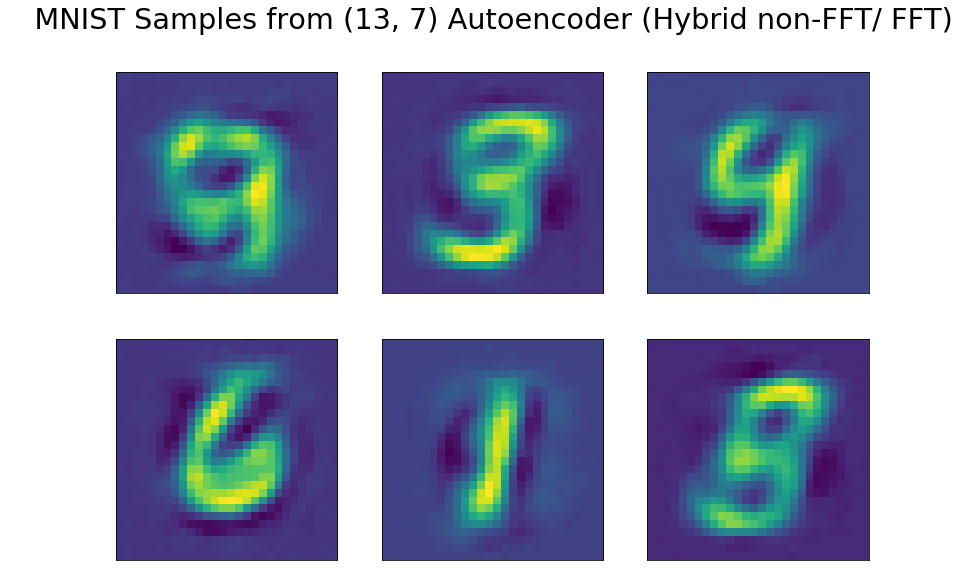

In [23]:
hybrid_autoencoded_plot((13,7))

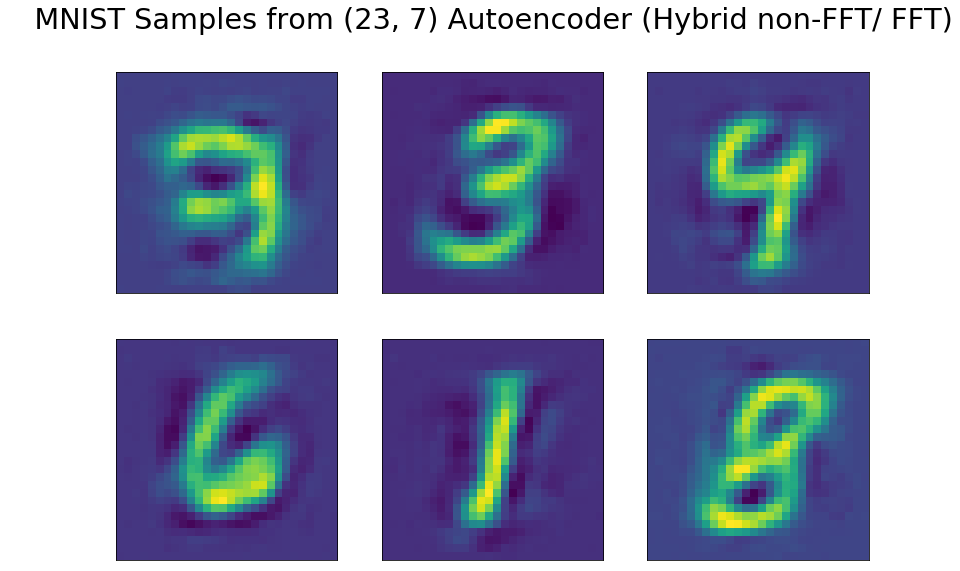

In [24]:
hybrid_autoencoded_plot((23,7))

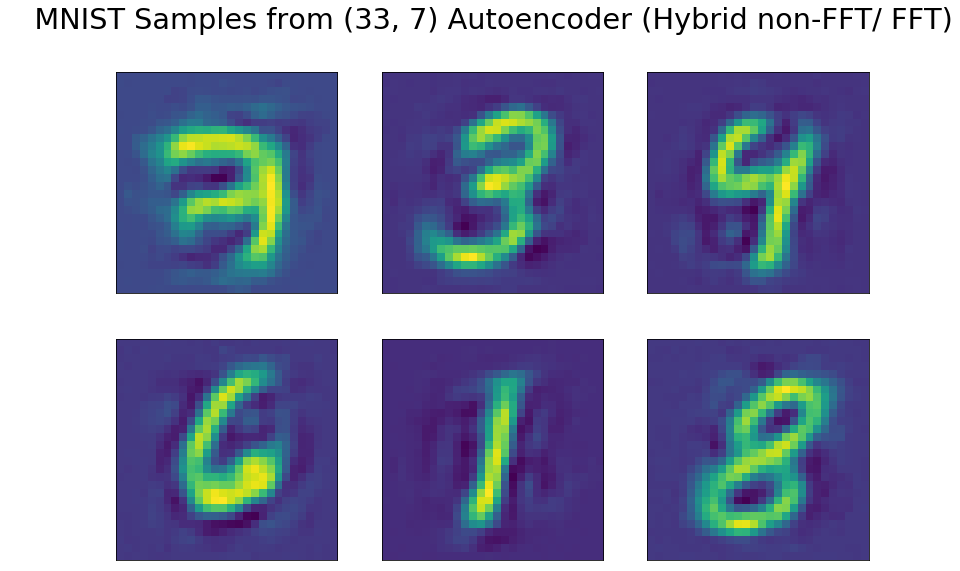

In [25]:
hybrid_autoencoded_plot((33,7))

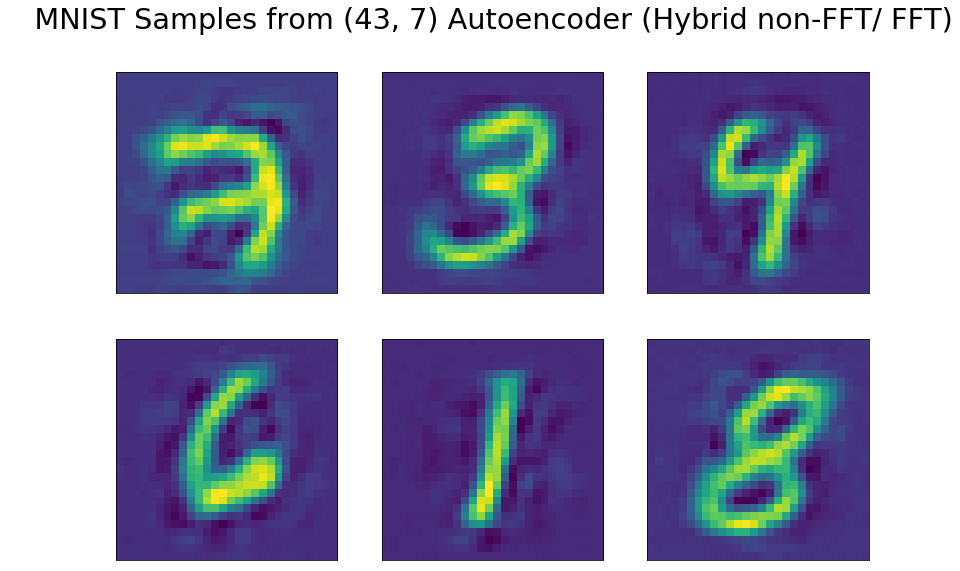

In [26]:
hybrid_autoencoded_plot((43,7))

### More Hybrid non-FFT /FFT Autoencoded Images

In [27]:
for dim_tuple in [(20, 0), (10, 10), (0, 20), (40, 0), (30, 10), (20, 20), (10, 30), (0, 40)]:
    fft_autoencoder.add_hybrid_autoencoded_data_set(mnist.train, dim_tuple)

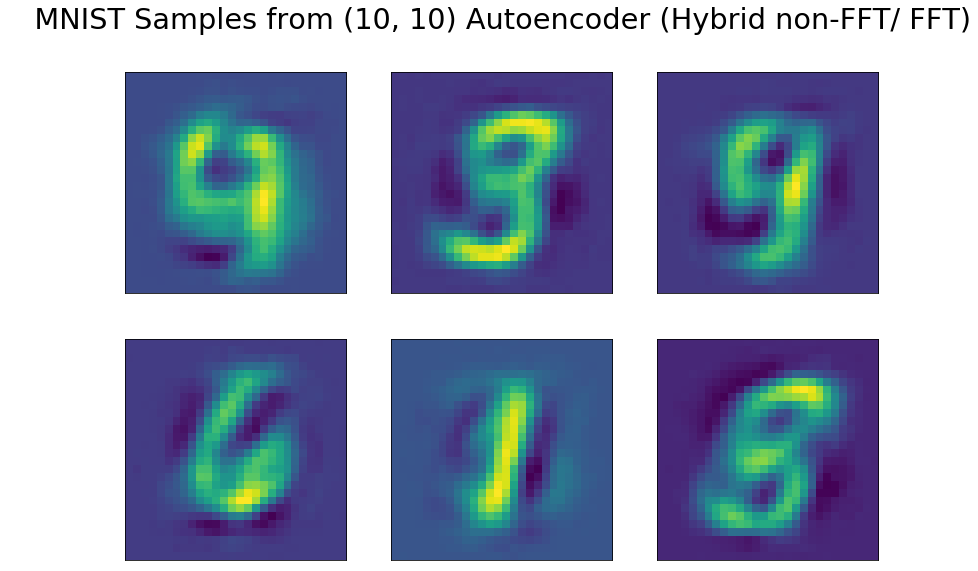

In [28]:
hybrid_autoencoded_plot((10,10))

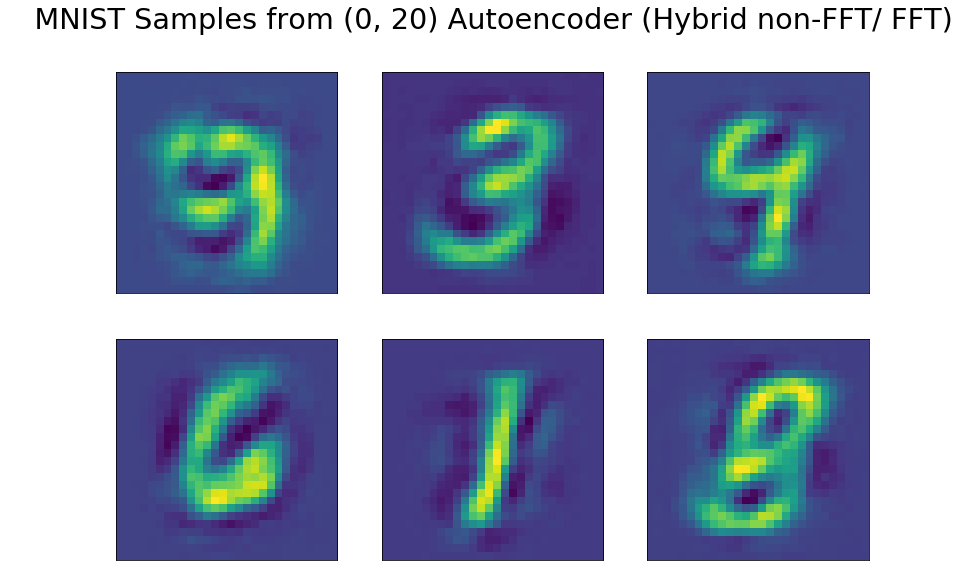

In [29]:
hybrid_autoencoded_plot((0,20))

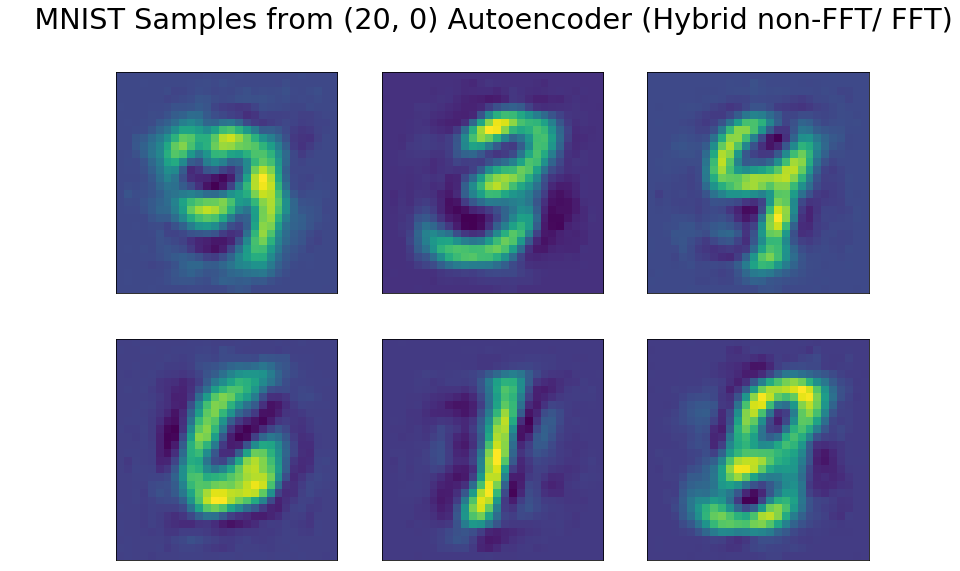

In [30]:
hybrid_autoencoded_plot((20,0))